<h2><center>Licenciatura en Tecnologías para la Información en Ciencias</center></h2>
<h2><center>Procesamiento de Imagenes</center></h2>
<h2><center>Tarea 5: Filtrado en la frecuencia</center></h2>
<h2><center>Luis David Huante García</center></h2>
<h2><center>Matrícula: 420138905</center></h2>
<h2><center>A 8 de noviembre de 2023</center></h2>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## Procedimiento
1. Desarrollar individualmente un programa que elimine ruido de imágenes, utilizando filtrado en el dominio de la frecuencia. Con base en el espectro de Fourier en 2D su programa debe eliminar el ruido periódico de las imágenes. El programa debe recibir como entrada la imagen ruidosa y debe devolver la imagen filtrada. Deberán probar (y debe funcionar correctamente) su desarrollo con las 5 imágenes que se anexan a la tarea.



In [ ]:
def butterworth(distance, radius, n):
    factor = (distance / radius)**(2 * n)
    filter_value = 1 / (1 + factor)

    return filter_value

In [ ]:
def fft(image):
    return np.fft.fftshift(np.fft.fft2(image))

def escala_logaritmica(fft_values):
    return 20 * np.log10(np.abs(fft_values))

def normalizar(log_image):
    return np.uint8(255 * log_image / np.max(log_image))

def TransformadaFourier(gray_img):
    gray_img_64 = np.float64(gray_img)

    # Calculo de la  Transformada 2D de Fourier
    Fuv = fft(gray_img_64)

    Fuv_log = escala_logaritmica(Fuv)

    Fuv_norm = normalizar(Fuv_log)

    return Fuv, Fuv_norm

In [ ]:
def matriz_distancias(size, center):
    Y, X = np.ogrid[-size[0]//2:size[0]//2, -size[1]//2:size[1]//2]
    return np.sqrt((X - center[0])**2 + (Y - center[1])**2)

def matriz_butterworth(distances, radius, n):
    return 1 / (1 + (distances / radius)**(2 * n))

def rechaza_bandas(centers, size):
    Huv = np.ones(size)

    for circle in centers.values():
        center = circle["center"]
        radius = circle["radius"]
        distances = matriz_distancias(size, center)
        Huv *= matriz_butterworth(distances, radius, 4)

    return Huv


In [ ]:
def filtrado_frecuencia(Fuv, Huv):
    gxy = np.fft.ifft2(Huv * Fuv)
    gxy_uint8 = np.uint8(np.clip(np.abs(gxy), 0, 255))
    return gxy_uint8

2. Por supuesto, la función que realice el proceso deberá recibir los parámetros necesarios (indicados manualmente) que permitan configurar el procesamiento correcto para cada imagen.


3. Como parte del informe mediante el cual entreguen su trabajo, deberán indicar los parámetros apropiados para ejecutar el programa sobre cada una de las imágenes y que estas queden sin ruido (en la medida de lo posible).

## Imagen 1

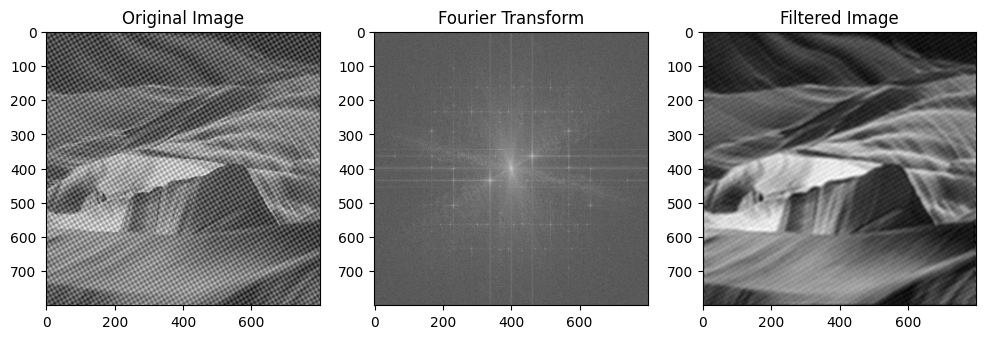

In [ ]:
# Procedimiento para la Imagen 1
img = Image.open('1.png').convert('L')
gray_img = np.array(img)

Fuv, Fuv_norm = TransformadaFourier(gray_img)

centros = {
    "filter1": {"center": (0,0), "radius": 50},

}
Huv = rechaza_bandas(centros, gray_img.shape)

imagen_filtrada = filtrado_frecuencia(Fuv, Huv)

plt.figure(figsize=(12, 4))
plt.subplot(131), plt.imshow(gray_img, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(Fuv_norm, cmap='gray'), plt.title('Fourier Transform')
plt.subplot(133), plt.imshow(imagen_filtrada, cmap='gray'), plt.title('Filtered Image')
plt.show()


## Imagen 2

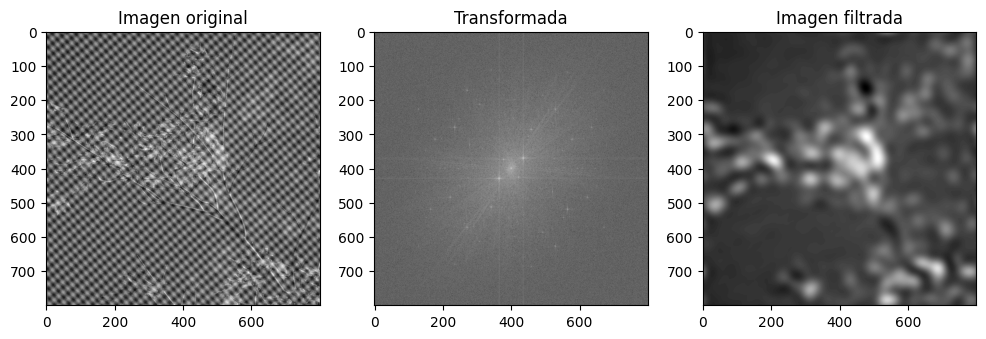

In [ ]:
# Procedimiento para la Imagen 4
img = Image.open('2.png').convert('L')
gray_img = np.array(img)

Fuv, Fuv_norm = TransformadaFourier(gray_img)

centers = {
    "filter1": {"center": (0,0), "radius": 18}
}
Huv = rechaza_bandas(centros, gray_img.shape)

imagen_filtrada = filtrado_frecuencia(Fuv, Huv)

plt.figure(figsize=(12, 4))
plt.subplot(131), plt.imshow(gray_img, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(Fuv_norm, cmap='gray'), plt.title('Fourier Transform')
plt.subplot(133), plt.imshow(imagen_filtrada, cmap='gray'), plt.title('Filtered Image')
plt.show()



## Imagen 3

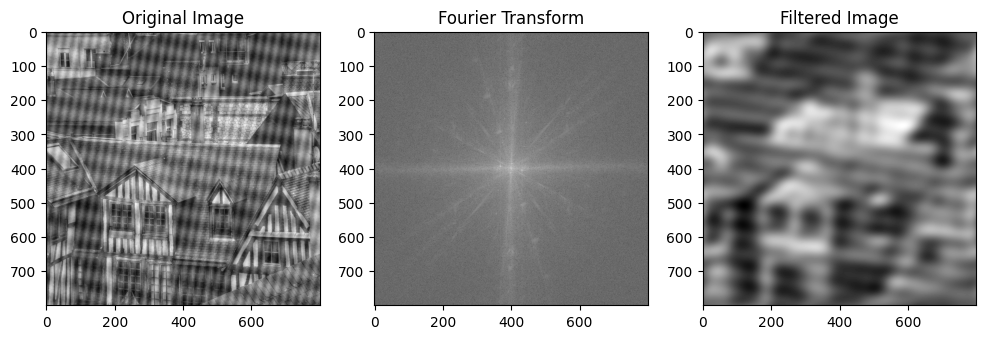

In [ ]:
# Procedimiento para la Imagen 3
img = Image.open('3.png').convert('L')
gray_img = np.array(img)

Fuv, Fuv_norm = TransformadaFourier(gray_img)

centros = {
    "filter1": {"center": (0,0), "radius": 20},
    "filter2": {"center": (10,-5), "radius": 20},
    "filter3": {"center": (-10, 5), "radius": 20}

}
Huv = rechaza_bandas(centros, gray_img.shape)

imagen_filtrada = filtrado_frecuencia(Fuv, Huv)

plt.figure(figsize=(12, 4))
plt.subplot(131), plt.imshow(gray_img, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(Fuv_norm, cmap='gray'), plt.title('Fourier Transform')
plt.subplot(133), plt.imshow(imagen_filtrada, cmap='gray'), plt.title('Filtered Image')
plt.show()


## Imagen 4

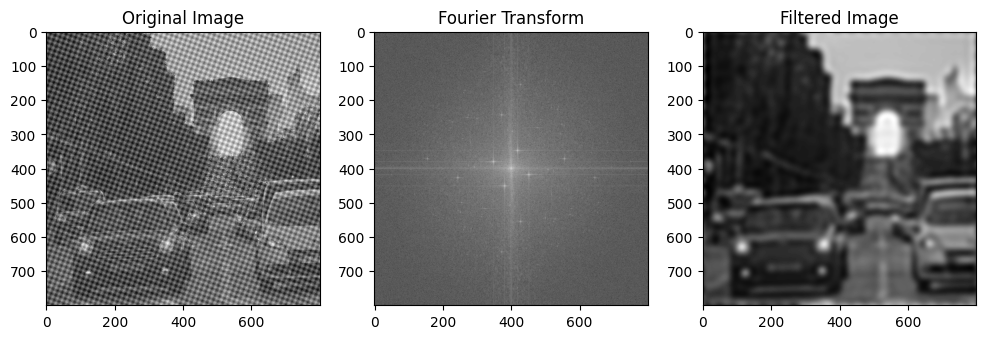

In [ ]:
# Procedimiento para la Imagen 4
img = Image.open('4.png').convert('L')
gray_img = np.array(img)

Fuv, Fuv_norm = TransformadaFourier(gray_img)

centros = {
    "filter1": {"center": (0,0), "radius": 25}

}

Huv = rechaza_bandas(centros, gray_img.shape)

imagen_filtrada = filtrado_frecuencia(Fuv, Huv)

plt.figure(figsize=(12, 4))
plt.subplot(131), plt.imshow(gray_img, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(Fuv_norm, cmap='gray'), plt.title('Fourier Transform')
plt.subplot(133), plt.imshow(imagen_filtrada, cmap='gray'), plt.title('Filtered Image')
plt.show()

## Imagen 5

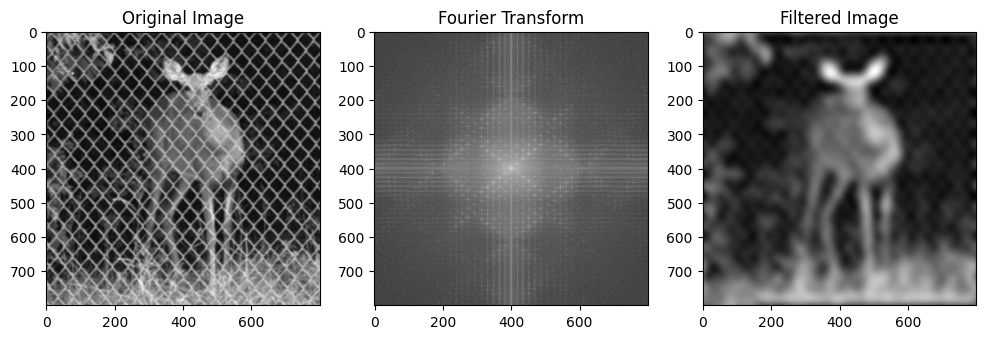

In [ ]:
# Procedimiento para la Imagen 5
img = Image.open('5.png').convert('L')
gray_img = np.array(img)

Fuv, Fuv_norm = TransformadaFourier(gray_img)

centros = {
    "filter1": {"center": (0,0), "radius": 15.5}

}

Huv = rechaza_bandas(centros, gray_img.shape)

imagen_filtrada = filtrado_frecuencia(Fuv, Huv)

plt.figure(figsize=(12, 4))
plt.subplot(131), plt.imshow(gray_img, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(Fuv_norm, cmap='gray'), plt.title('Fourier Transform')
plt.subplot(133), plt.imshow(imagen_filtrada, cmap='gray'), plt.title('Filtered Image')
plt.show()
